# Import Module and Data

In [1]:
#########################################################
# Imports modules
#########################################################

import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv1D,Conv2D, Flatten
from tensorflow.keras.layers import (Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Activation, Add, Flatten, Dense)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
my_path = os.getcwd()
my_dir = '/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL'

In [3]:
whole_x = np.load('/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_X_0616.npy')
whole_y = np.load('/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_Y_0616.npy')
print(whole_x.shape, whole_y.shape)

(17898, 5120, 8) (17898, 50)


In [4]:
df_PTB = pd.read_csv('/home/ubuntu/dr-you-ecg-20220420_mount/STEMI_JKL/PTB_multi_label_220616.csv')
df_PTB.head()

,ecg_id,patient_id,confirm_disease,filename_hr,1AVB,2AVB,3AVB,AFIB,AFLT,ALMI,...,NORM,NST_,PAC,PACE,PSVT,PVC,RAO_RAE,RVH,SEHYP,WPW
0,1,15709.0,['NORM'],records500/00000/00001_hr,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3,20372.0,['NORM'],records500/00000/00003_hr,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,17014.0,['NORM'],records500/00000/00004_hr,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,5,17448.0,['NORM'],records500/00000/00005_hr,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,19005.0,['NORM'],records500/00000/00006_hr,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
class_list = ['1AVB', '2AVB', '3AVB', 'AFIB', 'AFLT', 'ALMI', 'AMI', 'ANEUR',
       'ASMI', 'BIGU', 'CLBBB', 'CRBBB', 'DIG', 'EL', 'ILBBB', 'ILMI',
       'IMI', 'INJAL', 'INJAS', 'INJIL', 'INJIN', 'INJLA', 'IPLMI',
       'IPMI', 'IRBBB', 'ISCAL', 'ISCAN', 'ISCAS', 'ISCIL', 'ISCIN',
       'ISCLA', 'ISC_', 'IVCD', 'LAFB', 'LAO_LAE', 'LMI', 'LNGQT', 'LPFB',
       'LVH', 'NDT', 'NORM', 'NST_', 'PAC', 'PACE', 'PSVT', 'PVC',
       'RAO_RAE', 'RVH', 'SEHYP', 'WPW']

# Data Preset

In [6]:
x_train, x_test, y_train, y_test = train_test_split(whole_x, whole_y, test_size = 0.2, random_state = 321)

print('x_train: ',x_train.shape,'y_train: ', y_train.shape)
print('x_test: ',x_test.shape, 'y_test: ',y_test.shape)

x_train:  (14318, 5120, 8) y_train:  (14318, 50)
x_test:  (3580, 5120, 8) y_test:  (3580, 50)


In [7]:
df_y_test = pd.DataFrame(y_test)
df_y_test.sum()

0      167
1        4
2        2
3       11
4       16
5       41
6       27
7        1
8      311
9        4
10     106
11     103
12      27
13       1
14      15
15      69
16     206
17      29
18      43
19       5
20       3
21       1
22       7
23       6
24     204
25     118
26       7
27      28
28      28
29      34
30      18
31     227
32     154
33     339
34      50
35       6
36      25
37      40
38     208
39     365
40    1422
41     117
42       5
43      41
44      10
45     205
46      17
47       9
48       5
49       9
dtype: int64

# Build Model
---
## Attia
[reference]
https://pseudo-lab.github.io/Tutorial-Book/chapters/time-series/Ch5-CNN-LSTM.html

In [8]:
def Model():
    inputs = tf.keras.Input(shape=(5120, 8))
    
    x = tf.keras.layers.Conv1D(filters=16, padding = 'same', kernel_size=7, activation='relu')(inputs)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 2)(x)
    x = tf.keras.layers.Conv1D(filters=16, padding = 'same', kernel_size=5, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 4)(x)                           
    x = tf.keras.layers.Conv1D(filters=32, padding = 'same', kernel_size=5, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 2)(x)
    x = tf.keras.layers.Conv1D(filters=32, padding = 'same', kernel_size=5, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 4)(x)
    x = tf.keras.layers.Conv1D(filters=64, padding = 'same', kernel_size=5, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 2)(x)
    x = tf.keras.layers.Conv1D(filters=64, padding = 'same', kernel_size=3, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 2)(x)
    x = tf.keras.layers.Conv1D(filters=64, padding = 'same', kernel_size=3, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 2)(x)
    x = tf.keras.layers.Conv1D(filters=64, padding = 'same', kernel_size=3, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Conv1D(filters=128, padding = 'same', kernel_size=12, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPool1D(pool_size = 2)(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)

    x = tf.keras.layers.Dense(128, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    #x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    outputs = tf.keras.layers.Dense(50, activation = 'softmax')(x)
    
    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [9]:
model = Model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5120, 8)]         0         
                                                                 
 conv1d (Conv1D)             (None, 5120, 16)          912       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2560, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2560, 16)          1296      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 640, 16)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 640, 32)           2592  

# Train the Model

## Step1. Import WandB and Login

In [10]:
import wandb
from wandb.keras import WandbCallback

wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: kyulee (use `wandb login --relogin` to force relogin)


True

## Step2. Set x, y, model and Run

In [ ]:
#class_weight = {0:1, 1:10}

In [11]:
model_name = '220617_0935'
model_path = os.path.join('ami_model', model_name + '_bestmodel.h5')

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,
                                                monitor='val_accuracy',
                                                verbose=1,
                                                save_weights_only=False,
                                                save_best_only=True,
                                                mode='auto',
                                                save_freq='epoch')

run = wandb.init(project='PTB-XL', entity='kyulee', 
                 config={
                     #'class_weight': '{0:1, 1:10}', 
                     'batch_size':256, 
                     'epochs':50,
                     'loss_function':'binary_crossentropy', 
                     'architecture':'simple_Attia', 
                 })

config = wandb.config

model.summary()


model.compile(optimizer='adam', loss=config.loss_function, metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5120, 8)]         0         
                                                                 
 conv1d (Conv1D)             (None, 5120, 16)          912       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2560, 16)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 2560, 16)          1296      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 640, 16)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 640, 32)           2592  

In [12]:
history = model.fit(x_train, y_train, validation_split=0.1, 
                    batch_size=config.batch_size, 
                    epochs=config.epochs,
                    callbacks=[checkpoint,WandbCallback()],
                    #class_weight = class_weight,
                    verbose=1)

print("Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f} \n".format(
    config.epochs, max(history.history['accuracy']),max(history.history['val_accuracy']) ))

run.finish()

Epoch 1/50
51/51 [==============================] - ETA: 0s - loss: 0.3938 - accuracy: 0.0560
Epoch 00001: val_accuracy improved from -inf to 0.41620, saving model to ami_model/220617_0935_bestmodel.h5
51/51 [==============================] - 10s 130ms/step - loss: 0.3938 - accuracy: 0.0560 - val_loss: 0.0992 - val_accuracy: 0.4162 - _timestamp: 1655426114.0000 - _runtime: 29.0000
Epoch 2/50
51/51 [==============================] - ETA: 0s - loss: 0.1302 - accuracy: 0.2625
Epoch 00002: val_accuracy did not improve from 0.41620
51/51 [==============================] - 3s 50ms/step - loss: 0.1302 - accuracy: 0.2625 - val_loss: 0.0864 - val_accuracy: 0.4162 - _timestamp: 1655426117.0000 - _runtime: 32.0000
Epoch 3/50
51/51 [==============================] - ETA: 0s - loss: 0.1075 - accuracy: 0.3630
Epoch 00003: val_accuracy did not improve from 0.41620
51/51 [==============================] - 2s 47ms/step - loss: 0.1075 - accuracy: 0.3630 - val_loss: 0.0854 - val_accuracy: 0.4162 - _times

accuracy,▁▃▅▅▅▅▆▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇█████████████
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▂▃▃▃▄▃▄▃▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇██▇▇▇██▇▇▇▇█▇
val_loss,█▆▆▅▄▄▃▃▃▃▂▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁▂▁▂▂▂▁
accuracy,0.64869
best_epoch,35
best_val_loss,0.05755
epoch,49
loss,0.0487
val_accuracy,0.59846


## Step3. Review Training Process

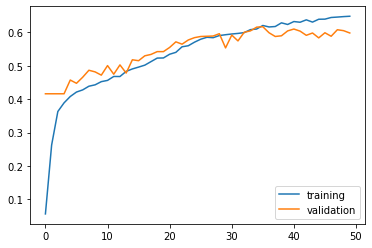

In [13]:
# Accuracy 비교
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()

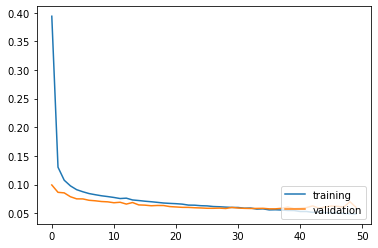

In [14]:
# Loss 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.show()

# Test the Model

## Step1. Test

In [15]:
from sklearn.metrics import accuracy_score

# make a prediction on the test set
y_proba = model.predict(x_test)
# round probabilities to class labels
y_pred = y_proba.round()
# calculate accuracy
acc = accuracy_score(y_test, y_pred)

In [16]:
acc

0.4818435754189944

## Step2. Interpret Test Result

In [34]:
index = 898

In [40]:
y_pred[index]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [41]:
y_test[index]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_list))

              precision    recall  f1-score   support

        1AVB       0.00      0.00      0.00       167
        2AVB       0.00      0.00      0.00         4
        3AVB       0.00      0.00      0.00         2
        AFIB       0.00      0.00      0.00        11
        AFLT       0.00      0.00      0.00        16
        ALMI       0.00      0.00      0.00        41
         AMI       0.00      0.00      0.00        27
       ANEUR       0.00      0.00      0.00         1
        ASMI       0.72      0.35      0.47       311
        BIGU       0.00      0.00      0.00         4
       CLBBB       0.94      0.84      0.89       106
       CRBBB       0.86      0.76      0.80       103
         DIG       0.00      0.00      0.00        27
          EL       0.00      0.00      0.00         1
       ILBBB       0.00      0.00      0.00        15
        ILMI       0.00      0.00      0.00        69
         IMI       0.00      0.00      0.00       206
       INJAL       0.00    

/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ubuntu/anaconda3/envs/tensorflow2_p38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

# save model

In [43]:
# save
from keras.models import load_model
model.save('/home/ubuntu/Kyulee/'+model_name+'_bestmodel.h5')